<a href="https://colab.research.google.com/github/marcelounb/ML-Mastery-with-Python-Course/blob/master/chap13_Comparing_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare Machine Learning Algorithms Consistently
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six diﬀerent classiﬁcation algorithms are compared on a single dataset:

*   Logistic Regression
*   Linear Discriminant Analysis
*   k-Nearest Neighbors
*   Classiﬁcation and Regression Trees
*   Naive Bayes
*   Support Vector Machines

In [0]:
from pandas import read_csv 
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [0]:
filename = '/content/diabetes_moddd.csv' 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names) 
array = dataframe.values 
X = array[:,0:8] 
Y = array[:,8] 

In [0]:
models = [] 
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 

In [12]:
# evaluate each model in turn 
results = [] 
names = []
message = []
scoring = 'accuracy' 
for name, model in models: 
  kfold = KFold(n_splits=20, random_state=7) 
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
  results.append(cv_results)
  names.append(name) 
  message.append([name, cv_results.mean(), cv_results.std()])
message

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

[['LR', 0.7789811066126855, 0.07666530994107668],
 ['LDA', 0.7790148448043184, 0.07786800941116603],
 ['KNN', 0.7166329284750338, 0.09102573481226331],
 ['CART', 0.6917678812415655, 0.08147604935911608],
 ['NB', 0.7553981106612685, 0.05733884826657266],
 ['SVM', 0.7647773279352227, 0.0765223242191987]]

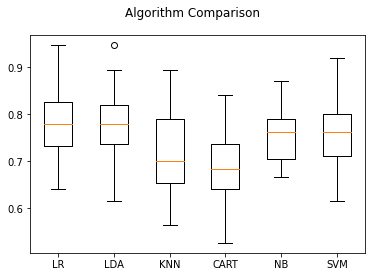

In [13]:
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()